# The Wonderful World of Julia

Lets us start with a very high level view of some of the things Julia can do. Even though it is a young language, you can still do a lot with it already, using Julia and its packages. 

###The Julia Set

In [3]:
function julia(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4
            return n-1
        end
        z = z*z + c
    end
    return maxiter
end

julia (generic function with 1 method)

In [4]:
m = [ uint8(julia(complex(r,i), complex(-.06,.67))) for i=1:-.002:-1, r=-1.5:.002:1.5 ];

INFO: Loading help data...


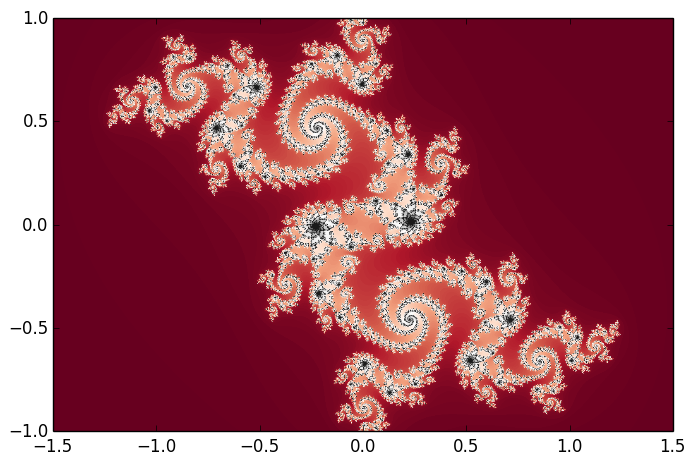

PyObject <matplotlib.image.AxesImage object at 0x113406590>

In [5]:
using PyPlot
imshow(m, cmap="RdGy", extent=[-1.5,1.5,-1,1])

###Statistics

In [6]:
using StatsBase
a=rand(400);
(mean(a), var(a), skewness(a))

(0.5086094107294636,0.08548401927521071,-0.05771342441337934)

In [7]:
quantile(a)

5-element Array{Float64,1}:
 0.00535671
 0.246477  
 0.530967  
 0.776851  
 0.999077  

In [8]:
cov(a * a')

400x400 Array{Float64,2}:
 0.00476396  0.00354512  0.00577349  …  0.0176407  0.0164509  0.0162318
 0.00354512  0.00263811  0.00429636     0.0131274  0.012242   0.0120789
 0.00577349  0.00429636  0.00699694     0.021379   0.019937   0.0196714
 0.00365009  0.00271623  0.00442358     0.0135161  0.0126045  0.0124366
 0.0125674   0.00935206  0.0152305      0.0465365  0.0433976  0.0428196
 0.00661227  0.00492054  0.00801347  …  0.024485   0.0228335  0.0225293
 0.0128489   0.00956157  0.0155717      0.047579   0.0443698  0.0437788
 0.0114375   0.00851121  0.0138611      0.0423524  0.0394957  0.0389697
 0.0131249   0.00976694  0.0159062      0.048601   0.0453229  0.0447192
 0.0156064   0.0116135   0.0189135      0.0577898  0.0538919  0.0531741
 0.0093056   0.00692479  0.0112775   …  0.0344582  0.032134   0.031706 
 0.00570205  0.00424319  0.00691036     0.0211144  0.0196903  0.019428 
 0.00938156  0.00698131  0.0113696      0.0347395  0.0323963  0.0319648
 ⋮                                   ⋱

In [9]:
using HypothesisTests
OneSampleTTest(a, 0.5)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0.5
    point estimate:          0.5086094107294636
    95% confidence interval: (0.479869863371665,0.5373489580872624)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5562439688678809 (not signficant)

Details:
    number of observations:   400
    t-statistic:              0.5889263092466149
    degrees of freedom:       399
    empirical standard error: 0.014618825130222566


In [10]:
using Distributions

W=Weibull(2,1)

Weibull(α=2.0, θ=1.0)

In [11]:
rand(W)

1.3829142696927068

###Integration

A pure julia numerical integration routine is buit in.

In [12]:
quadgk(x->sin(x), 0,pi)

(2.0000000000000004,1.7896795156957523e-12)

For greater accuracy, use the *Cubature* package

In [13]:
using Cubature
hquadrature(x->sin(x), 0,pi)

(2.0,2.220446049250313e-14)

###Plotting with Matplotlib

Matplotlib is an open source python library with an API similar to Matlab's plotting commands. It is available in Julia as the PyPlot package. 

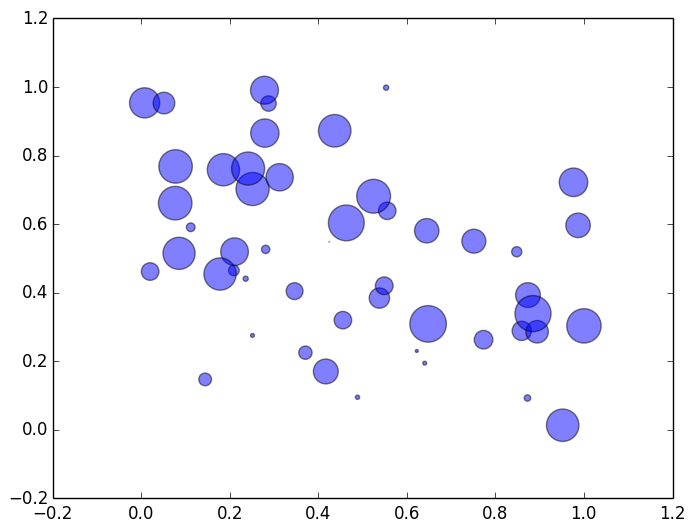

PyObject <matplotlib.collections.PathCollection object at 0x1062f71d0>

In [14]:
using PyPlot
srand(1)

x=rand(50)
y=rand(50)
area=pi.*(15.*rand(50)).^2
# 0 to 15 point radiuses
scatter(x, y, s=area, alpha=0.5)

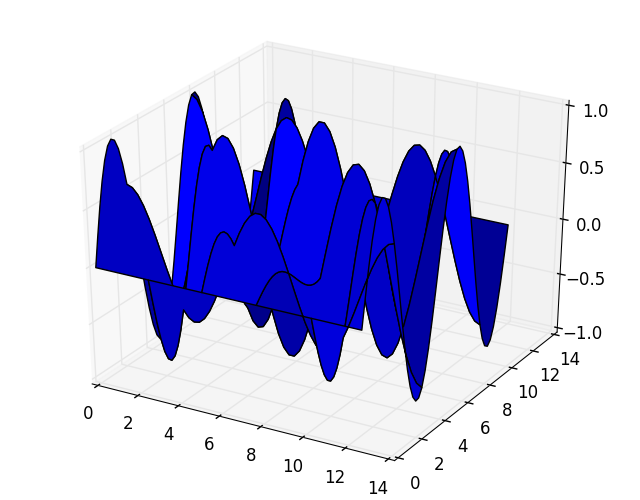

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x115b00910>

In [15]:
y = linspace(0,4π,50)
surf(y, y, sin(y) .* cos(y)')

There are other options for plotting. These include Gadfly and Winston, which are pure Julia, and Gaston, which is a wrapper around GNUPlot. 

###Optimisation: Linear Programming

Solves a simple knapsack problem:
``` 
  max sum(p_j x_j)
  st sum(w_j x_j) <= C
  x binary
 ```

In [18]:
using JuMP

m = Model(solver=Gurobi)
@defVar(m, x[1:5], Bin)
profit = [ 5, 3, 2, 7, 4 ]
weight = [ 2, 8, 4, 2, 5 ]
capacity = 10

# Objective: maximize profit
@setObjective(m, Max, dot(profit, x))

# Constraint: can carry all
@addConstraint(m, dot(weight, x) <= capacity)

# Solve problem using MIP solver
status = solve(m)

println("Objective is: ", getObjectiveValue(m))
println("Solution is:")
for i = 1:5
    print("x[$i] = ", getValue(x[i]))
    println(", p[$i]/w[$i] = ", profit[i]/weight[i])
end

Objective is: 16.0
Solution is:
x[1] = 1.0, p[1]/w[1] = 2.5
x[2] = 0.0, p[2]/w[2] = 0.375
x[3] = 0.0, p[3]/w[3] = 0.5
x[4] = 1.0, p[4]/w[4] = 3.5
x[5] = 1.0, p[5]/w[5] = 0.8


###Interactive Widgets

In [21]:
ex = :( x^5 + 5 * x - 5 )
dump(ex,7)

Expr 
  head: Symbol call
  args: Array(Any,(3,))
    1: Symbol -
    2: Expr 
      head: Symbol call
      args: Array(Any,(3,))
        1: Symbol +
        2: Expr 
          head: Symbol call
          args: Array(Any,(3,))
            1: Symbol ^
            2: Symbol x
            3: Int64 5
          typ: Any
        3: Expr 
          head: Symbol call
          args: Array(Any,(3,))
            1: Symbol *
            2: Int64 5
            3: Symbol x
          typ: Any
      typ: Any
    3: Int64 5
  typ: Any


In [17]:
using Interact
using SymPy
x = Sym("x")
@manipulate for n=0:10
    latex(SymPy.diff(sin(x^2), x, n))
end

Slider{Int64}([Input{Int64}] 5,"n",5,0:10)

Latex("","\$\$8 x \\left(4 x^{4} \\cos{\\left (x^{2} \\right )} + 20 x^{2} \\sin{\\left (x^{2} \\right )} - 15 \\cos{\\left (x^{2} \\right )}\\right)\$\$")